# Text Preprocessing


## Case Folding

In [1]:
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pandas as pd

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Andrian
[nltk_data]     Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Andrian
[nltk_data]     Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Andrian
[nltk_data]     Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Andrian
[nltk_data]     Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
df = pd.read_csv("Datasets/tugas.csv")
df

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...
...,...
14635,@AmericanAir thank you we got on a different f...
14636,@AmericanAir leaving over 20 minutes Late Flig...
14637,@AmericanAir Please bring American Airlines to...
14638,"@AmericanAir you have my money, you change my ..."


In [4]:
df['lower_case'] = df['text'].str.lower()
df

,text,lower_case
0,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.
1,@VirginAmerica plus you've added commercials t...,@virginamerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...,@virginamerica i didn't today... must mean i n...
3,@VirginAmerica it's really aggressive to blast...,@virginamerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...,@virginamerica and it's a really big bad thing...
...,...,...
14635,@AmericanAir thank you we got on a different f...,@americanair thank you we got on a different f...
14636,@AmericanAir leaving over 20 minutes Late Flig...,@americanair leaving over 20 minutes late flig...
14637,@AmericanAir Please bring American Airlines to...,@americanair please bring american airlines to...
14638,"@AmericanAir you have my money, you change my ...","@americanair you have my money, you change my ..."


## Tokenization

In [5]:
#NLTK
df['tokens_nltk'] = df['lower_case'].apply(lambda x: word_tokenize(x))
print("Text:", df['lower_case'][0])
print("Tokenization (NLTK):", df['tokens_nltk'][0])

Text: @virginamerica what @dhepburn said.
Tokenization (NLTK): ['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']


In [6]:
#SPACY
#python -m spacy download en_core_web_sm 
nlp = spacy.load("en_core_web_sm")

In [7]:
df['tokens_spacy'] = list(nlp.pipe(df['lower_case']))
df['tokens_spacy'] = df['tokens_spacy'].apply(lambda doc: [token.text for token in doc])
print("Text:", df['lower_case'][0])
print("Tokenization (SpaCy):", df['tokens_spacy'][0])

Text: @virginamerica what @dhepburn said.
Tokenization (SpaCy): ['@virginamerica', 'what', '@dhepburn', 'said', '.']


## Stemming

In [8]:
def stem(tokens_nltk):
    stemmer = PorterStemmer()
    stems = [stemmer.stem(word) for word in tokens_nltk]
    return stems
df['stems_nltk'] = df['tokens_nltk'].apply(lambda x: stem(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Stemming:", df['stems_nltk'][0])

df['stems_spacy'] = df['tokens_spacy'].apply(lambda x: stem(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Stemming:", df['stems_spacy'][0])

Tokenization (NLTK): ['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']
Stemming: ['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']
Tokenization (SpaCy): ['@virginamerica', 'what', '@dhepburn', 'said', '.']
Stemming: ['@virginamerica', 'what', '@dhepburn', 'said', '.']


## Lemmatization

In [9]:
def lemma(tokens_nltk):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word, pos="v") for word in tokens_nltk]
    return lemmas
df['lemmas_nltk'] = df['tokens_nltk'].apply(lambda x: lemma(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Lemmatization:", df['lemmas_nltk'][0])

df['lemmas_spacy'] = df['tokens_spacy'].apply(lambda x: lemma(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Lemmatization:", df['lemmas_spacy'][0])

Tokenization (NLTK): ['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']
Lemmatization: ['@', 'virginamerica', 'what', '@', 'dhepburn', 'say', '.']
Tokenization (SpaCy): ['@virginamerica', 'what', '@dhepburn', 'said', '.']
Lemmatization: ['@virginamerica', 'what', '@dhepburn', 'say', '.']


## Remove Stopwords

In [10]:
def stop_w(tokens_nltk):
    stop_words = set(stopwords.words("english"))
    tokens_filtered = [word for word in tokens_nltk if word.lower() not in stop_words]
    return tokens_filtered
df['remove_stop_words_nltk'] = df['tokens_nltk'].apply(lambda x: stop_w(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Stopword Removal:", df['remove_stop_words_nltk'][0])

df['remove_stop_words_spacy'] = df['tokens_spacy'].apply(lambda x: stop_w(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Stopword Removal:", df['remove_stop_words_spacy'][0])

Tokenization (NLTK): ['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']
Stopword Removal: ['@', 'virginamerica', '@', 'dhepburn', 'said', '.']
Tokenization (SpaCy): ['@virginamerica', 'what', '@dhepburn', 'said', '.']
Stopword Removal: ['@virginamerica', '@dhepburn', 'said', '.']


## Word Cloud

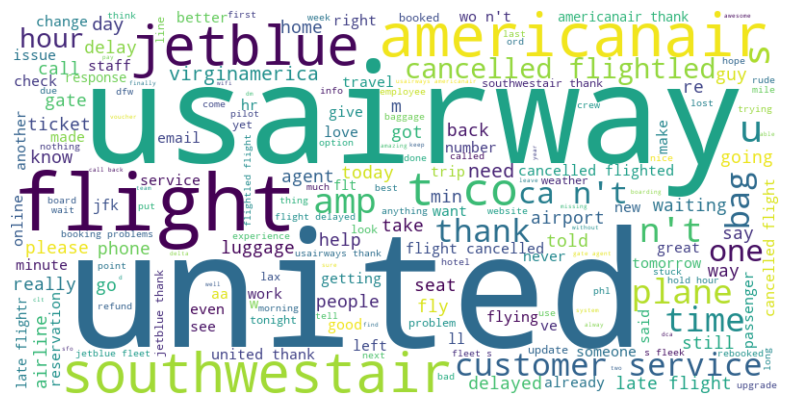

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join([" ".join(words) for words in df['remove_stop_words_nltk']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  
plt.show()


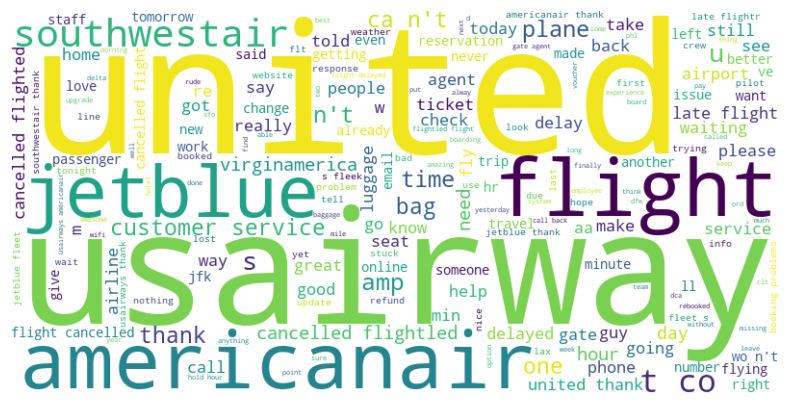

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join([" ".join(words) for words in df['remove_stop_words_spacy']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()